In [1]:
import numpy as np
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

##### preprocessing

In [3]:
from sklearn import preprocessing as prep

In [4]:
le = prep.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])
list(le.classes_)

['amsterdam', 'paris', 'tokyo']

In [5]:
from sklearn.preprocessing import LabelBinarizer

In [6]:
binarizer = prep.LabelBinarizer()
# 与OneHotEncoder的区别是LabelBinarizer只对一维数据编码，主要用于target编码，而不是特征
# Binarize labels in a one-vs-all fashion
t = binarizer.fit(iris.target).transform(iris.target)

In [31]:
x = np.arange(0,12).reshape(3,4)

In [37]:
a = np.array([[1,3],[0,5],[10,6]])
b = prep.OneHotEncoder(categories='auto').fit(a)

In [42]:
b.categories_

[array([ 0,  1, 10]), array([3, 5, 6])]

In [46]:
b.transform(a).toarray()

array([[0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1.]])

In [47]:
c = np.array([['c'], ['b'], ['a']])
scaler = prep.OneHotEncoder(categories=[['a','b','c','f']]).fit(c)

#### impute

In [80]:
from sklearn import impute

In [81]:
simputer = impute.SimpleImputer(missing_values=np.nan, strategy='mean')

In [82]:
simputer.fit([[1, 2], [np.nan, 3], [7, 6]])

SimpleImputer()

In [83]:
simputer.statistics_

array([4.        , 3.66666667])

参数stragegy：mean，median，most_frequent，constant

In [74]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# 建立其他特征预测某一特征的回归模型，预测缺失值

In [75]:
imp = IterativeImputer(max_iter=10, random_state=0)

In [76]:
from sklearn.impute import KNNImputer

In [77]:
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [86]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [87]:
t = binarizer.fit(iris.target).transform(iris.target)

#### metrics

In [46]:
from sklearn import metrics

In [47]:
y = np.array([0, 0, 0, 1, 1, 1])
scores = np.array([0.2, 0.6, 0.4, 0.6, 0.8, 0.8])

In [48]:
fpr, tpr, threads = metrics.roc_curve(y, scores)

In [49]:
fpr

array([0.        , 0.        , 0.33333333, 1.        ])

In [50]:
tpr

array([0.        , 0.66666667, 1.        , 1.        ])

In [54]:
threads

array([1.8, 0.8, 0.6, 0.2])

In [52]:
metrics.auc(fpr, tpr)  # 计算曲线下面的面积，fpr必须是单调递增或递减

0.9444444444444444

In [53]:
metrics.roc_auc_score(y, scores)

0.9444444444444444

#### model_selection

In [62]:
from sklearn.model_selection import KFold
k_fold = KFold(3, shuffle=False) # shuffle=False时，按照原先的排序分
k_fold.split(iris.data)  # 得到生成器，每次返回(test_indices, train_indices)，训练集和测试集的下标

<generator object _BaseKFold.split at 0x12d6c6de0>

In [70]:
spl = model_selection.ShuffleSplit(n_splits=3,test_size=None, train_size=None)  # n_splits=3表示分3次
spl.split(iris.data, iris.target)  # 返回生成器，迭代3次，每次都是按照test_size,train_size比例划分的X和Y数据

<generator object BaseShuffleSplit.split at 0x12d6c6ed0>

In [69]:
model_selection.StratifiedShuffleSplit(n_splits=10) # 按照Y类别分层split数据

StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=None,
            train_size=None)

In [74]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
      iris.data, iris.target, test_size=0.33, random_state=42)
# 实际上就是包装了ShuffleSplit，直接返回划分后的数据，而不是下标

In [76]:
# cross_val_score(c, data, target, cv=kv, scoring=scorer)
# cross_val_score(c, data, target, cv=kv)
# 交叉验证，返回每次验证集上的score

```python
# 看一下有没有过拟合的嫌疑
train_size, train_accuracy, test_accuracy = learning_curve(c, data, target, cv=kv, shuffle=True, random_state=999, train_sizes = [0.1,0.25,0.5,0.75,0.9,1])
plt.plot(train_size, train_accuracy.mean(axis=1), 'o-', color='r', label='Training')
plt.plot(train_size, test_accuracy.mean(axis=1), 'o-', color='g', label='Test')
plt.show()
```

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import learning_curve,validation_curve,cross_val_score,GridSearchCV

In [31]:
breast = datasets.load_breast_cancer()

In [55]:
scorer = metrics.make_scorer(metrics.roc_auc_score, needs_threshold=True)

In [59]:
lpo = model_selection.LeavePOut(1)
kv = model_selection.StratifiedKFold(3, random_state=99)

In [39]:
n_estimators = [10,20,30,50,100,120,150]
max_depth = [2,3,4,5,6]
min_impurity_decrease = [0,0.05, 0.1, 0.15, 0.2, 0.5]
max_features = [5,10,15,20, 25] # 最后调
criterion = ['gini', 'entropy']

In [43]:
clf = RandomForestClassifier(random_state=999)

In [78]:
import xgboost as xgb

In [80]:
d = xgb.DMatrix(breast.data, breast.target)

作者：章华燕
链接：https://zhuanlan.zhihu.com/p/31182879
```
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',  # 多分类的问题
    'num_class': 10,               # 类别数，与 multisoftmax 并用
    'gamma': 0.1,                  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth': 12,               # 构建树的深度，越大越容易过拟合
    'lambda': 2,                   # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'subsample': 0.7,              # 随机采样训练样本
    'colsample_bytree': 0.7,       # 生成树时进行的列采样
    'min_child_weight': 3,
    'silent': 1,                   # 设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.007,                  # 如同学习率
    'seed': 1000,
    'nthread': 4,                  # cpu 线程数
}
```

In [91]:
from sklearn import linear_model
from sklearn import datasets
boston = datasets.load_boston()
reg = linear_model.LinearRegression()
reg.fit(boston.data, boston.target)
reg._residues  # 残差平方和
reg.score(boston.data, boston.target)  # R square

0.7406426641094095

In [97]:
reg = linear_model.Ridge(alpha=0.5)
reg.fit(boston.data, boston.target)

Ridge(alpha=0.5)

In [98]:
reg.score(boston.data, boston.target)

0.739957023371629

In [99]:
reg = linear_model.RidgeCV(alphas=[0.01,0.02,0.05,0.1,0.5])
reg.fit(boston.data, boston.target)

RidgeCV(alphas=array([0.01, 0.02, 0.05, 0.1 , 0.5 ]))

In [102]:
reg.score(boston.data, boston.target)

0.7406313966518082

In [107]:
from sklearn import naive_bayes

In [111]:
m = naive_bayes.GaussianNB().fit(iris.data, iris.target)

In [141]:
m.sigma_ # 方差

array([[0.121764, 0.140816, 0.029556, 0.010884],
       [0.261104, 0.0965  , 0.2164  , 0.038324],
       [0.396256, 0.101924, 0.298496, 0.073924]])

In [142]:
m.theta_ # 均值

array([[5.006, 3.428, 1.462, 0.246],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]])

In [144]:
iris.data[iris.target==0,].mean(axis=0)

array([5.006, 3.428, 1.462, 0.246])

In [156]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import validation_curve

In [147]:
breast = datasets.load_breast_cancer()

In [151]:
c = DecisionTreeClassifier()

In [152]:
depth = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
minsplit = [2,3,4,5,6,7,8]

In [157]:
train_acc, test_acc = validation_curve(c, breast.data, breast.target, param_name='max_depth', param_range=depth, cv=10, scoring='accuracy')

In [159]:
train_acc.shape

(15, 10)

In [166]:
test_acc.mean(axis=1)

array([0.92098997, 0.90689223, 0.91929825, 0.9174812 , 0.92098997,
       0.92277569, 0.92271303, 0.92277569, 0.9139411 , 0.91218672,
       0.91920426, 0.92277569, 0.910401  , 0.90698622, 0.92446742])

In [167]:
from sklearn.model_selection import GridSearchCV

In [168]:
iris = datasets.load_iris()
c = DecisionTreeClassifier()

In [169]:
grid = GridSearchCV(c, dict(max_depth=depth, min_samples_split=minsplit), cv=10)

In [173]:
grid.fit(iris.data, iris.target)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8]})

In [180]:
grid.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [195]:
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred, normalize=False)

2

In [199]:
from sklearn.metrics import recall_score

In [201]:
recall_score(y_true, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None)

0.5

In [202]:
import numpy as np
import sklearn.preprocessing as prep
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt

In [343]:
scaler = prep.StandardScaler()
digits = datasets.load_digits()
clf = svm.SVC(kernel='rbf', C=10)

In [344]:
x.shape

(1797, 64)

In [345]:
x = digits.data
x = scaler.fit(x).transform(x)
y = digits.target

In [346]:
train_size, train_loss, test_loss = learning_curve(
    clf, x, y, cv=10,
    scoring='neg_mean_squared_error',
    train_sizes=[0.1,0.25,0.5,0.75,1])

In [347]:
train_loss_mean = -np.mean(train_loss,axis=1)
test_loss_mean = -np.mean(test_loss,axis=1)

In [348]:
test_loss_mean

array([4.267455  , 1.49271881, 0.7245779 , 0.62676909, 0.33842644])

In [349]:
train_loss_mean

array([-0., -0., -0., -0., -0.])

In [350]:
train_size

array([ 161,  404,  808, 1212, 1617])

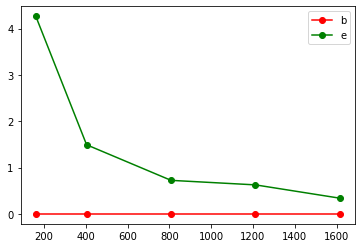

In [351]:
plt.figure()
plt.plot(train_size,train_loss_mean,'o-',color='r',label='Training')
plt.plot(train_size,test_loss_mean,'o-',color='g',label='Cross-validation')
plt.legend('best')
plt.show()

In [274]:
help(svm.SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  